## Visualizing a Bivariate Gaussian Distribution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

2-D distribution using vars X and Y:

In [2]:
N = 60
X = np.linspace(-5, 5, N)
Y = np.linspace(-5, 5, N)
X, Y = np.meshgrid(X, Y)

Mean vector and covariance matrix: (below is special case for diagonal gaussian distribution)

In [3]:
mu = np.array([-1., 1.])
Sigma = np.array([[ 0 , 0],
                   [0,  .]])

Pack X and Y into a single 3-D array

In [4]:
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

define function that returns the multivariate gaussian distribution

In [5]:
def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos.

    pos is an array constructed by packing the meshed arrays of variables
    x_1, x_2, x_3, ..., x_k into its _last_ dimension.

    """

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

Plot

/Users/yeshg/miniconda3/envs/RL/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in sqrt
  if sys.path[0] == '':
/Users/yeshg/miniconda3/envs/RL/lib/python3.6/site-packages/matplotlib/contour.py:1557: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/Users/yeshg/miniconda3/envs/RL/lib/python3.6/site-packages/matplotlib/contour.py:1558: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/Users/yeshg/miniconda3/envs/RL/lib/python3.6/site-packages/matplotlib/contour.py:1203: RuntimeWarning: invalid value encountered in less
  under = np.nonzero(lev < self.zmin)[0]
/Users/yeshg/miniconda3/envs/RL/lib/python3.6/site-packages/matplotlib/contour.py:1205: RuntimeWarning: invalid value encountered in greater
  over = np.nonzero(lev > self.zmax)[0]
/Users/yeshg/miniconda3/envs/RL/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered i

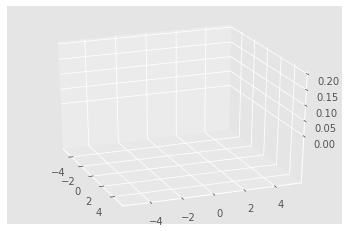

In [6]:
# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, Sigma)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -21)

plt.show()

Pack X and Y into a single 3-D array

Pack X and Y into a single 3-D array